<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Python_TIme_Series_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to video explaining the code - https://www.youtube.com/watch?v=rBkqkpl21v8

In [1]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

start = datetime.date(2017, 1 ,1)
end = datetime.date(2020, 7, 2)

url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result = requests.get(url)
result.content

b'{"bpi":{"2017-01-01":997.6888,"2017-01-02":1018.05,"2017-01-03":1030.8175,"2017-01-04":1129.87,"2017-01-05":1005.815,"2017-01-06":895.67,"2017-01-07":905.17,"2017-01-08":913.5238,"2017-01-09":899.35,"2017-01-10":904.7925,"2017-01-11":775.9813,"2017-01-12":802.8288,"2017-01-13":826.1213,"2017-01-14":818.6388,"2017-01-15":822.4225,"2017-01-16":830.2638,"2017-01-17":904.4538,"2017-01-18":884.2513,"2017-01-19":898.0213,"2017-01-20":891.6238,"2017-01-21":920.0113,"2017-01-22":925.3313,"2017-01-23":912.6875,"2017-01-24":885.6475,"2017-01-25":894.11,"2017-01-26":915.1,"2017-01-27":918.5625,"2017-01-28":920.28,"2017-01-29":914.0438,"2017-01-30":920.2413,"2017-01-31":967.6675,"2017-02-01":987.3463,"2017-02-02":1007.795,"2017-02-03":1018.1113,"2017-02-04":1033.6525,"2017-02-05":1013.9938,"2017-02-06":1024.6125,"2017-02-07":1052.5388,"2017-02-08":1054.3438,"2017-02-09":988.9475,"2017-02-10":993.0788,"2017-02-11":1010.0025,"2017-02-12":999.5125,"2017-02-13":996.8575,"2017-02-14":1009.2513,"2017-

In [3]:
data = pd.read_json(result.content)

In [4]:
data

,bpi,disclaimer,time
2017-01-01,997.6888,This data was produced from the CoinDesk Bitco...,NaN
2017-01-02,1018.0500,This data was produced from the CoinDesk Bitco...,NaN
2017-01-03,1030.8175,This data was produced from the CoinDesk Bitco...,NaN
2017-01-04,1129.8700,This data was produced from the CoinDesk Bitco...,NaN
2017-01-05,1005.8150,This data was produced from the CoinDesk Bitco...,NaN
...,...,...,...
2020-06-30,9144.3850,This data was produced from the CoinDesk Bitco...,NaN
2020-07-01,9153.9500,This data was produced from the CoinDesk Bitco...,NaN
2020-07-02,9199.8750,This data was produced from the CoinDesk Bitco...,NaN
updated,NaN,This data was produced from the CoinDesk Bitco...,"Jul 3, 2020 00:03:00 UTC"


In [5]:
data = pd.read_json(result.content).iloc[:-2,:1]
data.index.name = 'date'
data.index = pd.to_datetime(data.index)
data

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2020-06-28,8991.5000
2020-06-29,9096.1500
2020-06-30,9144.3850


In [7]:
data.dtypes

bpi    float64
dtype: object

<AxesSubplot:xlabel='date'>

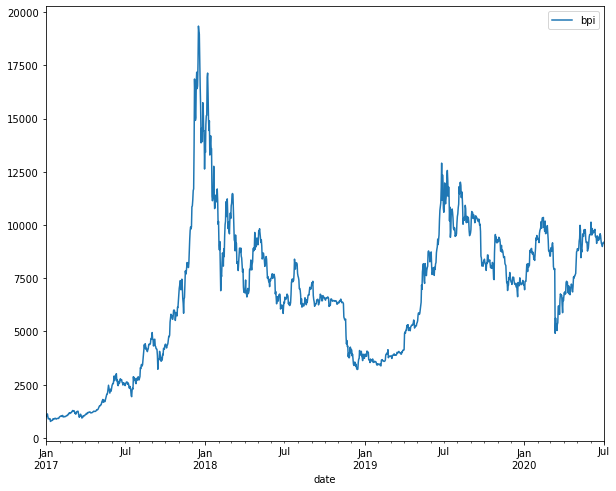

In [6]:
data.plot()

D	Calendar day	

B	Business day

W	Weekly		

M	Month

Q	Quarter

A	Year end

H	Hours

T	Minutes		

S	Seconds		


In [8]:
data.resample('Q').mean()

,bpi
date,
2017-03-31,1034.169242
2017-06-30,1919.658520
2017-09-30,3506.611449
2017-12-31,9413.347972
2018-03-31,10468.423818
2018-06-30,7747.165877
2018-09-30,6798.307918
2018-12-31,5169.904503
2019-03-31,3781.639959


<AxesSubplot:xlabel='date'>

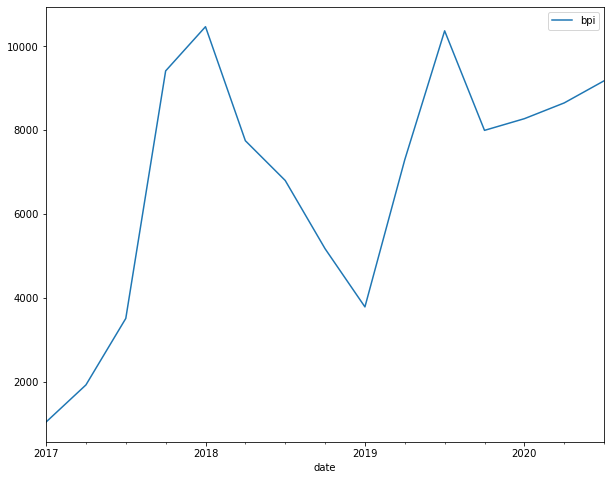

In [9]:
data.resample('Q').mean().plot()

<AxesSubplot:xlabel='date'>

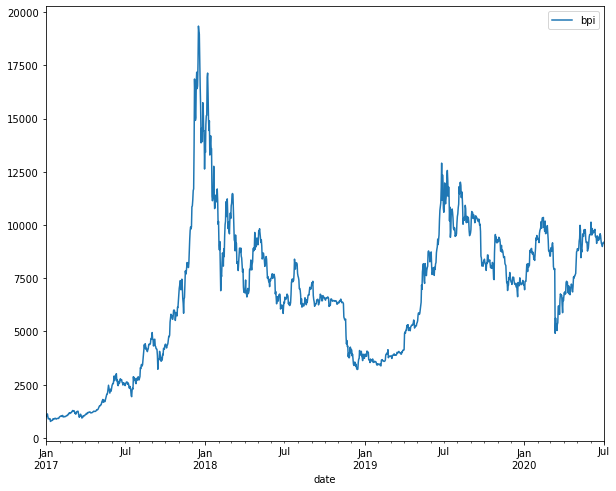

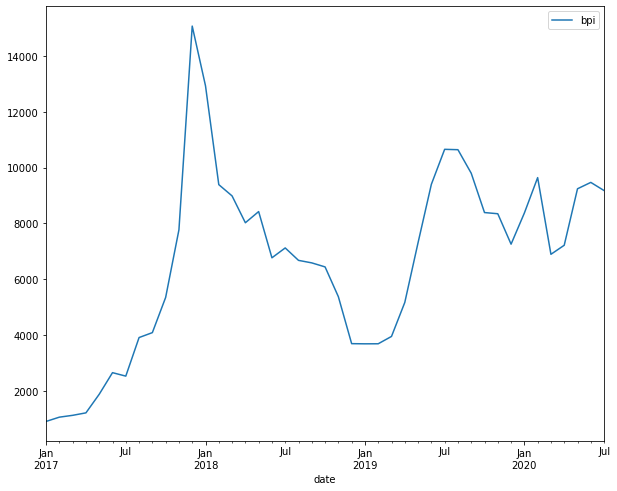

In [10]:
data.plot()
data.resample('M').mean().plot()

In [11]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [ ]:
data[:5].diff(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


In [12]:
data[:5].diff()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


<AxesSubplot:xlabel='date'>

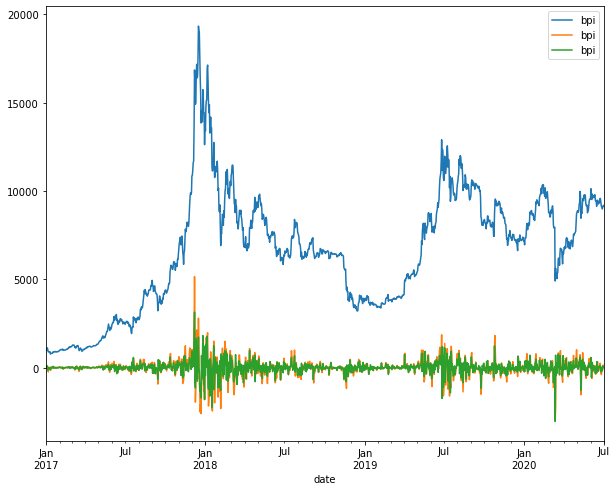

In [13]:
pd.concat([data['bpi'], data['bpi'].diff(2), data['bpi'].diff()],axis=1).plot()

#### To removing trentz part/doing the trending of data this-diff fucntion is going to be very usefull

In [14]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [15]:
data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,997.6888
2017-01-03,1018.0500
2017-01-04,1030.8175
2017-01-05,1129.8700


In [16]:
data[:5].tshift(2)

<ipython-input-16-da555377c95d>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  data[:5].tshift(2)


,bpi
date,
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175
2017-01-06,1129.8700
2017-01-07,1005.8150


In [17]:
data[:5] - data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


In [ ]:
data[:5] - data[:5].shift(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


<ipython-input-18-1bfdd55a04cf>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  pd.concat([data,data-data.shift(), data.tshift(365)],axis=1).plot()


<AxesSubplot:xlabel='date'>

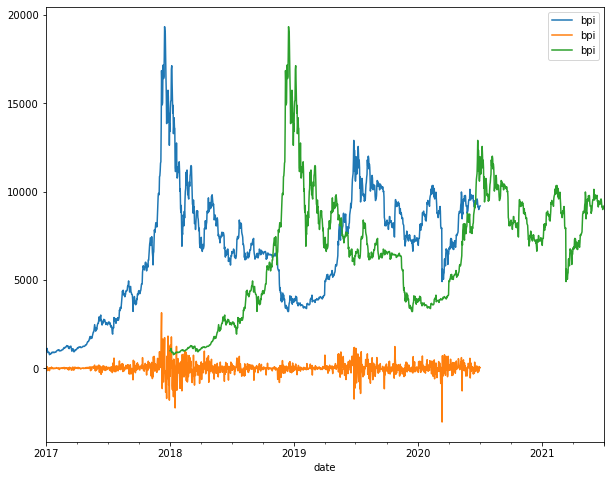

In [18]:
pd.concat([data,data-data.shift(), data.tshift(365)],axis=1).plot()

<AxesSubplot:xlabel='date'>

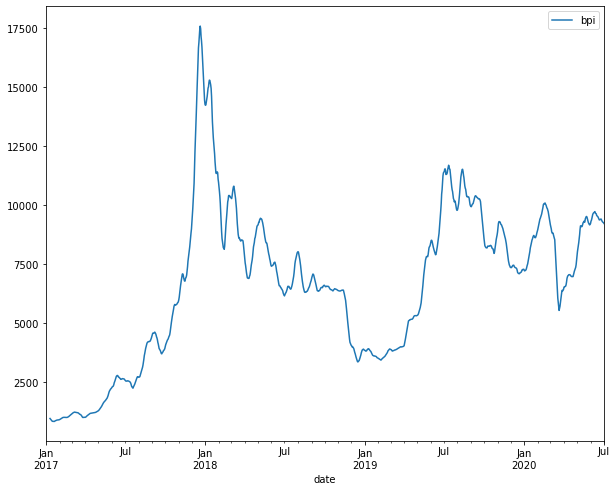

In [19]:
data.rolling(window=10).mean().plot()

<AxesSubplot:xlabel='date'>

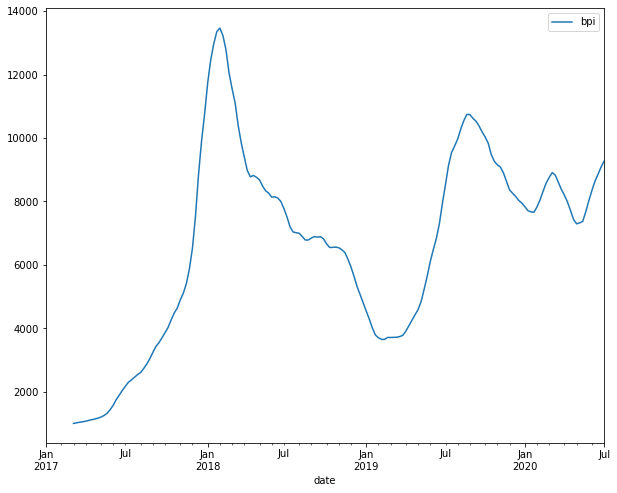

In [20]:
data.resample('W').mean().rolling(window=10).mean().plot()

<AxesSubplot:xlabel='date'>

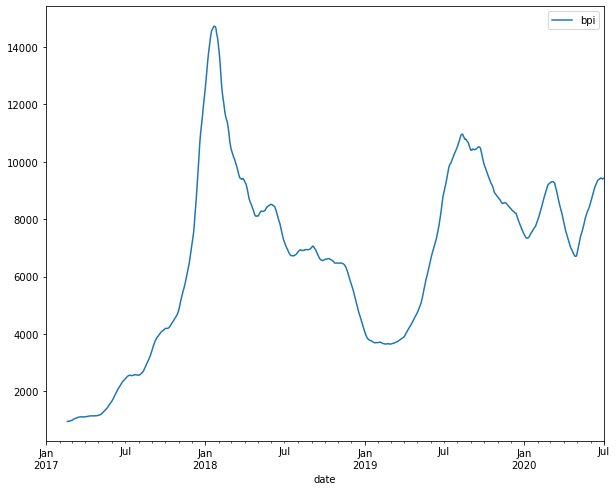

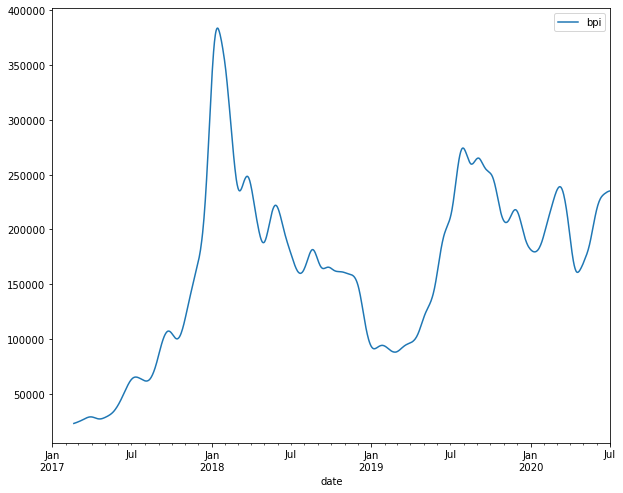

In [21]:
data.rolling(window=50).mean().plot()
data.rolling(window=50, win_type='gaussian').sum(std=10).plot()

<AxesSubplot:xlabel='date'>

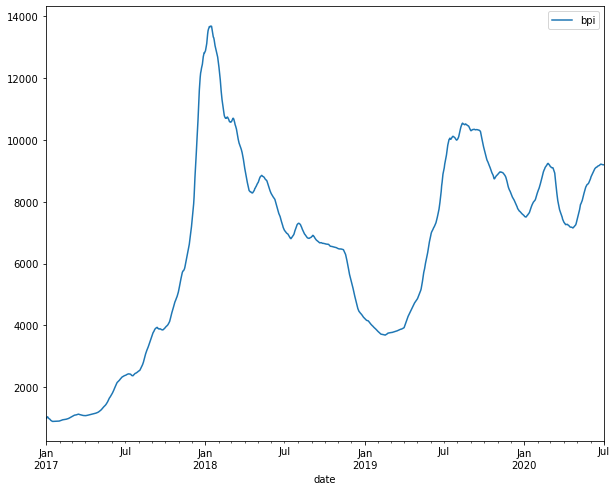

In [22]:
data.ewm(span=50).mean().plot()

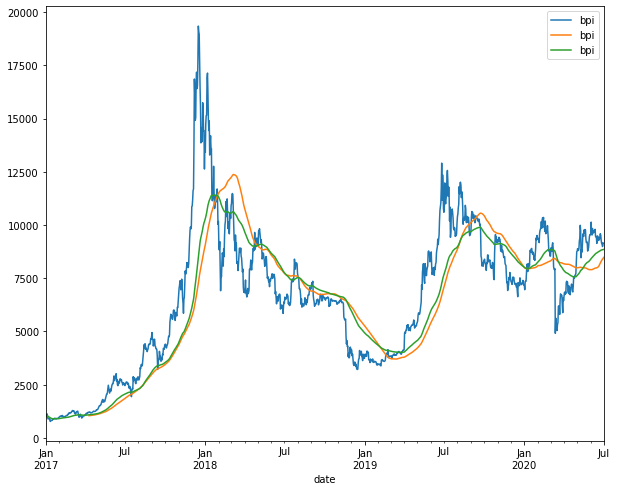

In [ ]:
pd.concat([data,data.rolling(window=100).mean(), data.ewm(span=100).mean()],axis=1).plot()